In [299]:
import numpy as np
import pandas as pd
import seaborn as sns

In [280]:
hd = pd.read_csv('dataset/data.csv')
hd.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
len(hd)

4600

In [4]:
null_str = "Null Values:\n"
for c in hd.columns:
    null_str += f"{c}: {len(hd[hd[c].isnull()])}\n"
print(null_str)

Null Values:
date: 0
price: 0
bedrooms: 0
bathrooms: 0
sqft_living: 0
sqft_lot: 0
floors: 0
waterfront: 0
view: 0
condition: 0
sqft_above: 0
sqft_basement: 0
yr_built: 0
yr_renovated: 0
street: 0
city: 0
statezip: 0
country: 0



In [5]:
hd.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
street           4525
city               44
statezip           77
country             1
dtype: int64

In [6]:
hd['view'].unique()

array([0, 4, 1, 2, 3])

In [183]:
hd['waterfront'] = np.where(hd['waterfront'] == 0, False, True)
hd['waterfront'].value_counts()

waterfront
False    4567
True       33
Name: count, dtype: int64

In [8]:
hd['bedrooms'].value_counts()

bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64

In [9]:
hd['bathrooms'].unique()

array([1.5 , 2.5 , 2.  , 2.25, 1.  , 1.75, 2.75, 3.  , 3.25, 3.5 , 8.  ,
       4.25, 4.  , 3.75, 5.  , 4.5 , 5.75, 1.25, 6.5 , 4.75, 0.75, 5.25,
       5.5 , 6.25, 0.  , 6.75])

In [10]:
hd['bathrooms'].value_counts()

bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: count, dtype: int64

In [11]:
hd[hd['bathrooms'] == 6.75]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2654,2014-06-17 00:00:00,4668000.0,5.0,6.75,9640,13068,1.0,True,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA


In [12]:
hd['sqft_living'].mean()

np.float64(2139.3469565217392)

In [13]:
hd['floors'].unique()

array([1.5, 2. , 1. , 2.5, 3. , 3.5])

In [14]:
import matplotlib.pyplot as plt

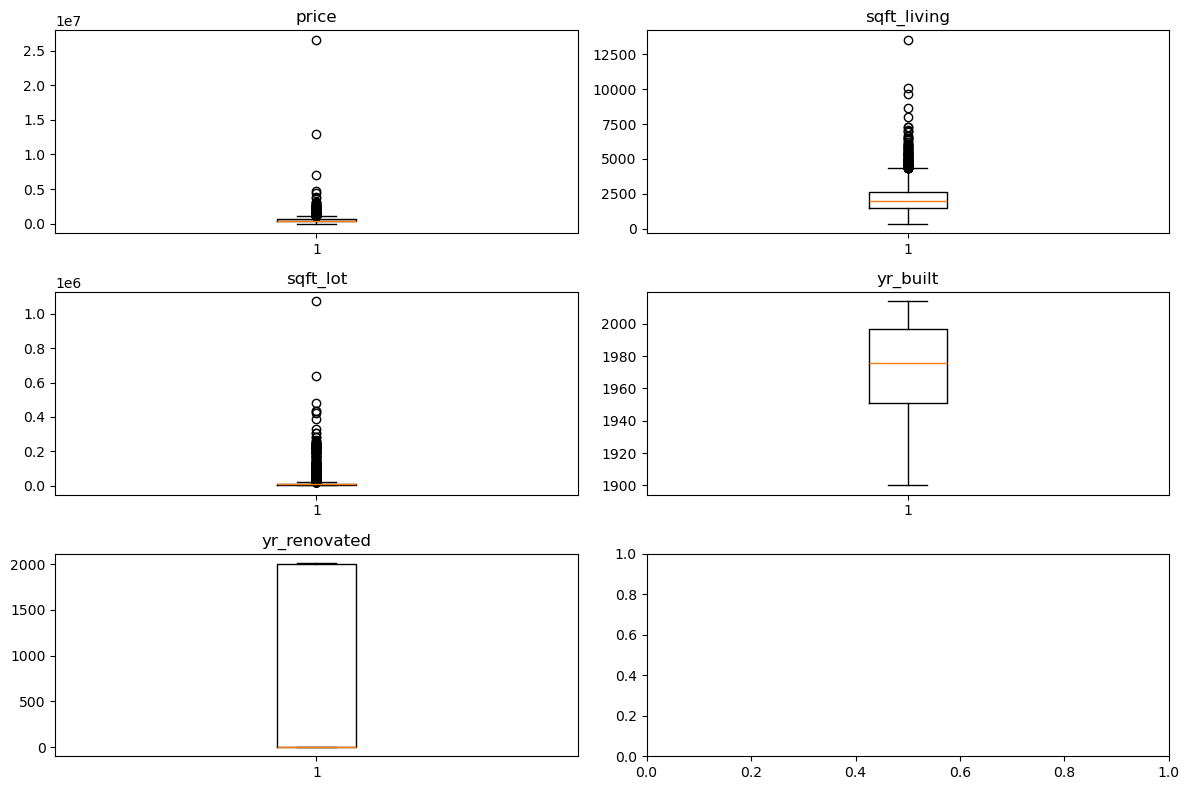

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
plt_data = ['price', 'sqft_living', 'sqft_lot', 'yr_built', 'yr_renovated']
axes = axes.flatten()

for i in range(5):
    axes[i].set_title(plt_data[i])
    axes[i].boxplot(hd[plt_data[i]])

plt.tight_layout()


In [16]:
hd['yr_renovated'].value_counts()

yr_renovated
0       2735
2000     170
2003     151
2009     109
2001     109
2005      95
2004      77
2014      72
2006      68
2013      61
1923      57
1994      57
1989      55
2011      54
2012      45
2008      45
1988      43
1999      41
2002      41
1983      41
1998      40
1993      39
1912      33
1979      32
1992      32
2010      30
1985      29
1997      28
1996      22
1982      22
1972      17
1990      16
1956      15
1963      12
1969      11
1984      10
1970       9
1968       9
1954       8
1945       7
2007       7
1974       6
1934       6
1971       5
1958       5
1986       5
1978       3
1980       2
1995       2
1955       2
1977       1
1913       1
1991       1
1948       1
1966       1
1960       1
1987       1
1953       1
1981       1
1975       1
Name: count, dtype: int64

Text(0.5, 1.0, 'Year of Renovation')

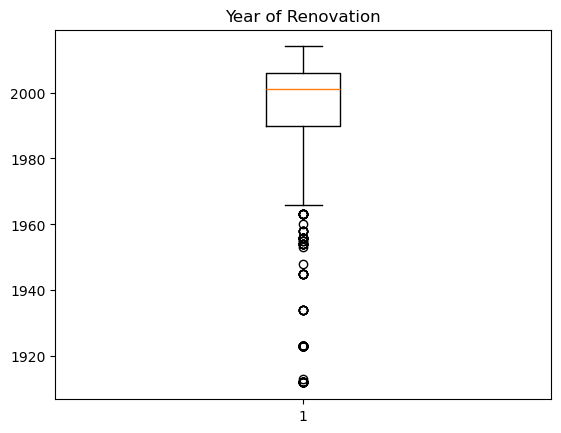

In [17]:
renovated_homes = hd[hd['yr_renovated'] != 0]
plt.boxplot(renovated_homes['yr_renovated'])
plt.title("Year of Renovation")

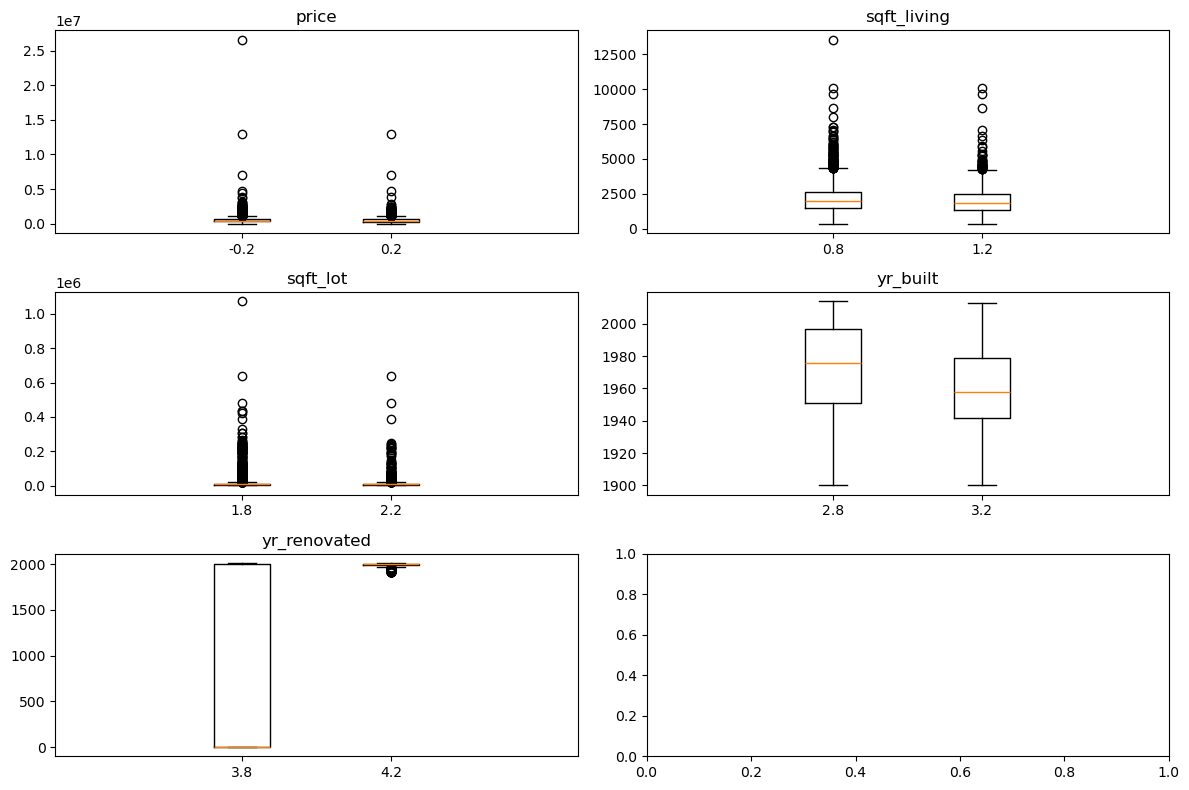

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(5):
    axes[i].set_title(plt_data[i])
    axes[i].boxplot(renovated_homes[plt_data[i]], positions=[i + 0.2])
    axes[i].boxplot(hd[plt_data[i]], positions=[i - 0.2])

plt.tight_layout()

In [19]:
def get_zip(statezip):
    return int(statezip[2:])

hd['zip'] = hd['statezip'].apply(get_zip)

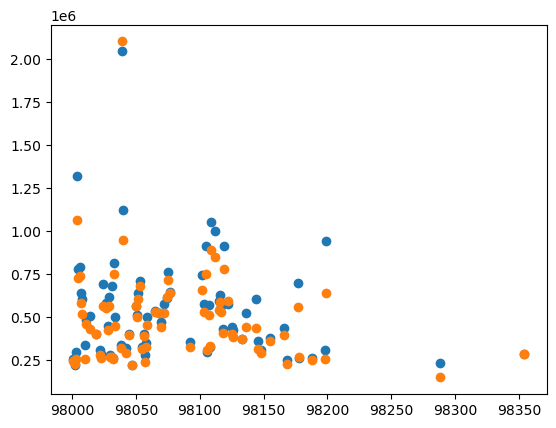

In [20]:
mean_price_by_zip = hd.groupby('zip')['price'].mean()
median_price_by_zip = hd.groupby('zip')['price'].median()

plt.scatter(mean_price_by_zip.index, mean_price_by_zip)
plt.scatter(median_price_by_zip.index, median_price_by_zip)

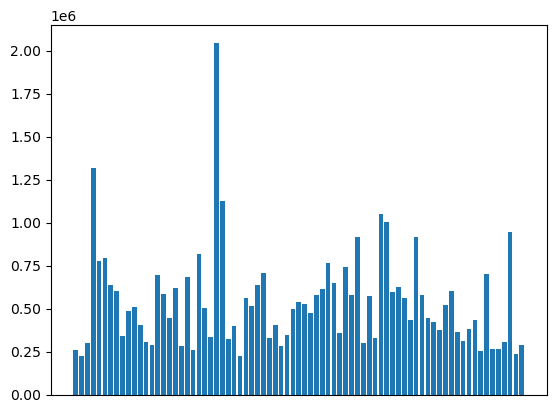

In [21]:
test = hd.groupby('statezip')['price'].mean()

plt.bar(test.index, test)
plt.gca().xaxis.set_visible(False)

In [22]:
hd = hd.drop('zip', axis=1)

In [23]:
from scipy.stats import kruskal

In [24]:
groups = []
for _, group_df in hd.groupby('statezip'):
    groups.append(group_df['price'].values)

stat, p = kruskal(*groups)
print("Kruskal-Wallis statistic:", stat)
print("p-value:", p)

Kruskal-Wallis statistic: 2427.562428491536
p-value: 0.0


In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ C(statezip)', data=hd).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq      df          F         PR(>F)
C(statezip)  2.550911e+14    76.0  12.577956  5.953703e-136
Residual     1.206975e+15  4523.0        NaN            NaN


In [26]:
model = ols('price ~ C(date)', data=hd).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                sum_sq      df         F    PR(>F)
C(date)   2.188289e+13    69.0  0.997553  0.483551
Residual  1.440183e+15  4530.0       NaN       NaN


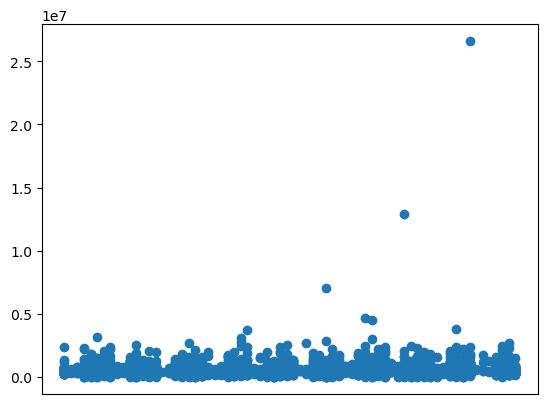

In [27]:
plt.scatter(hd['date'], hd['price'])
plt.gca().xaxis.set_visible(False)

In [28]:
groups = []
for _, group_df in hd.groupby('date'):
    groups.append(group_df['price'].values)

h, p = kruskal(*groups)
print(f"h-statistic: {h}, p-value: {p}")

h-statistic: 81.583513229448, p-value: 0.1427167835193277


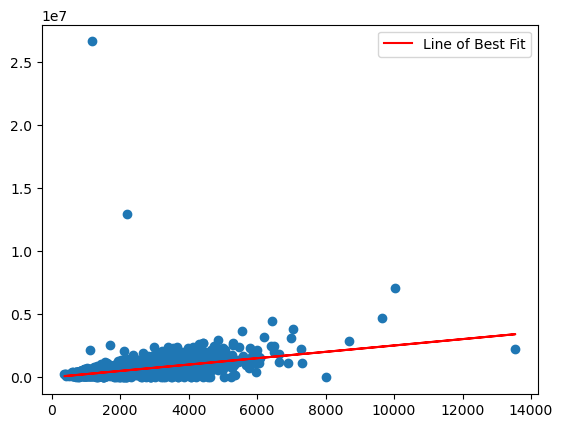

In [29]:
plt.scatter(hd['sqft_living'], hd['price'])
slope_sp, intercept_sp = np.polyfit(hd['sqft_living'], hd['price'], 1)
line = slope_sp * hd['sqft_living'] + intercept_sp

plt.plot(hd['sqft_living'], line, color='red', label='Line of Best Fit')
plt.legend()

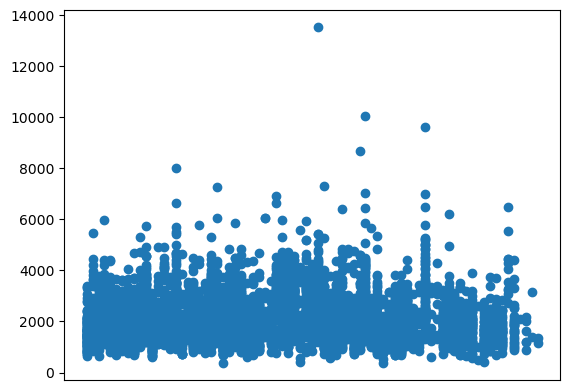

In [30]:
plt.scatter(hd['statezip'], hd['sqft_living'])
plt.gca().xaxis.set_visible(False)

In [31]:
groups = []
for _, group_df in hd.groupby('statezip'):
    groups.append(group_df['sqft_living'].values)

h, p = kruskal(*groups)
print(f"h-statistic: {h}, p-value: {p}")

h-statistic: 997.3190001901215, p-value: 1.407190095339225e-160


In [32]:
hd['statezip'].nunique()

77

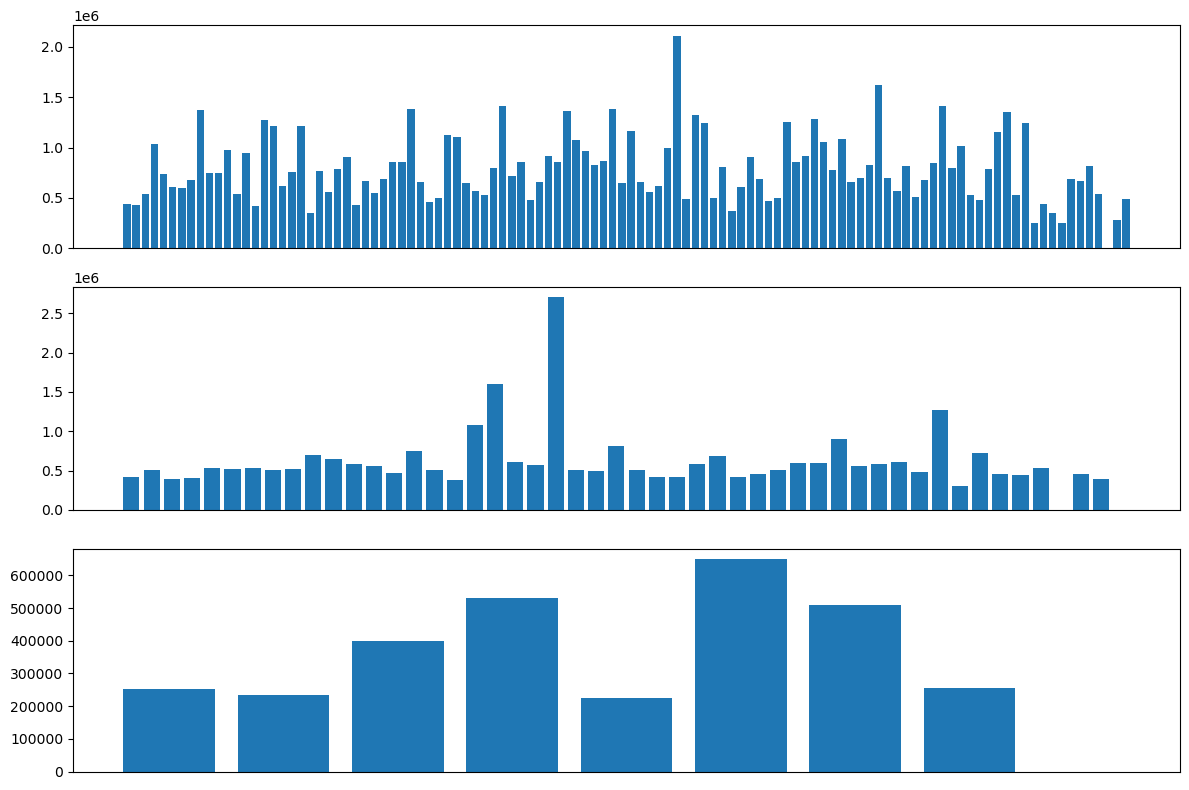

In [33]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8))
axes = axes.flatten()

zip_group = hd.groupby('statezip')
zip_group = zip_group.filter(lambda x: x.name in ['WA 98006', 'WA 98008', 'WA 98010'])

axes[0].bar(zip_group[zip_group['statezip'] == 'WA 98006']['street'], zip_group[zip_group['statezip'] == 'WA 98006']['price'])
axes[1].bar(zip_group[zip_group['statezip'] == 'WA 98008']['street'], zip_group[zip_group['statezip'] == 'WA 98008']['price'])
axes[2].bar(zip_group[zip_group['statezip'] == 'WA 98010']['street'], zip_group[zip_group['statezip'] == 'WA 98010']['price'])

axes[0].xaxis.set_visible(False)
axes[1].xaxis.set_visible(False)
axes[2].xaxis.set_visible(False)
fig.tight_layout()

In [204]:
import re
from scipy import stats
from scipy.stats import f

def anova(formula, dataset):
    if len(formula.split()) > 3: raise ValueError("Invalid formula")
    alpha = 0.5

    dep_var, ind_var = re.sub('\s+', '', formula).split('~')

    mean_total = dataset[dep_var].mean()
    mean_within = dataset.groupby(ind_var)[dep_var].mean()
    dataset2 = dataset.set_index(ind_var)
    vlcs = dataset[ind_var].value_counts()
    ssw = []
    ssb = []

    for ind in mean_within.index:
        len_ind = vlcs.loc[ind]

        ssw.append(((dataset2.loc[ind][dep_var] - mean_within.loc[ind]) ** 2).sum())
        ssb.append(((mean_within.loc[ind] - mean_total) ** 2) * len_ind)

    ssb = np.array(ssb).sum()
    ssw = np.array(ssw).sum()

    dfb = dataset[ind_var].nunique() - 1
    dfw = len(dataset) - dfb - 1

    msb = ssb / dfb
    msw = ssw / dfw

    F_statistic = msb / msw
    F_critical = stats.f.ppf(1 - alpha, dfb, dfw)
    p = 1 - f.cdf(F_statistic, dfb, dfw)

    return F_statistic, p, F_critical, ssw, ssb, dfb, dfw


f_stat, p_val, f_crit, ssw, ssb, dfb, dfw = anova("price ~ bedrooms", hd)
print(f"dfb: {dfb}, dfw: {dfw}\nF-statistic: {f_stat}, p-value: {p_val}, f-critical value: {f_crit}\nssw: {ssw:.6e}, ssb: {ssb:.6e}")
model = ols('price ~ bedrooms', data=hd).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

dfb: 25, dfw: 4574
F-statistic: 27.695021091239155, p-value: 1.1102230246251565e-16, f-critical value: 0.9736057111654794
ssw: 1.269847e+15, ssb: 1.922193e+14
                 sum_sq      df          F         PR(>F)
bathrooms  1.922193e+14    25.0  27.695021  2.454166e-120
Residual   1.269847e+15  4574.0        NaN            NaN


In [102]:
hd.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [127]:
len(hd)

4600

In [184]:
mapping = {1: "one", 2: "two", 3: "three", 4: "four", 5: "five"}
hd['bedrooms'] = hd['bedrooms'].replace(mapping)

In [186]:
hd['price'].corr(hd['bathrooms'])

np.float64(0.32710991828773534)

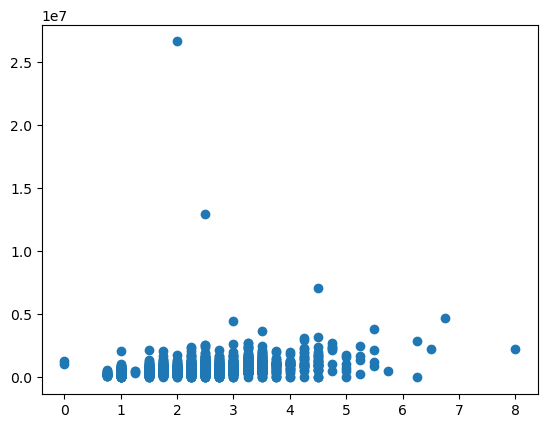

In [188]:
plt.scatter(hd['bathrooms'], hd['price'])

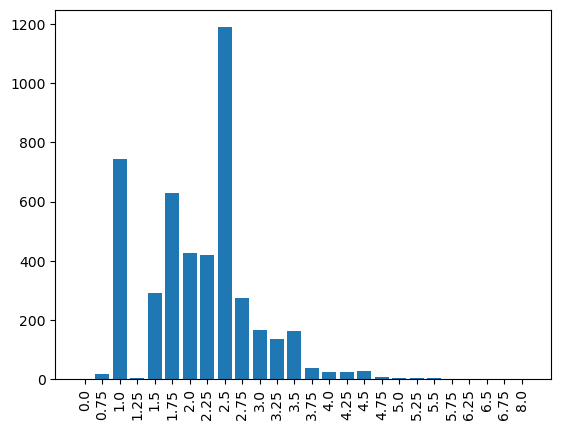

In [201]:
hd['bathrooms'] = hd['bathrooms'].apply(lambda x: str(x))
counts = hd['bathrooms'].value_counts().sort_index()
plt.bar(counts.index, counts)
plt.xticks(rotation=90)
plt.show()

In [203]:
f_stat, p_val, f_crit, ssw, ssb, dfb, dfw = anova("price ~  bathrooms", hd)
print(f"dfb: {dfb}, dfw: {dfw}\nF-statistic: {f_stat}, p-value: {p_val}, f-critical value: {f_crit}\nssw: {ssw:.6e}, ssb: {ssb:.6e}")

dfb: 25, dfw: 4574
F-statistic: 27.695021091239155, p-value: 1.1102230246251565e-16, f-critical value: 0.9736057111654794
ssw: 1.269847e+15, ssb: 1.922193e+14


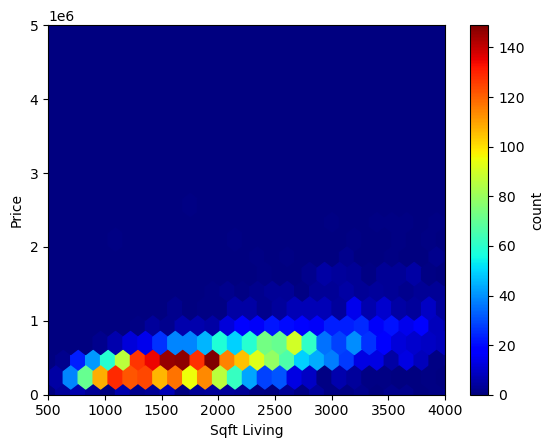

In [218]:
plt.hexbin(hd['sqft_living'], hd['price'], cmap='jet')
plt.xlim(500, 4000)
plt.ylim(0, 0.5e7)
plt.xlabel('Sqft Living')
plt.ylabel('Price')
cb = plt.colorbar()
cb.set_label('count')
plt.show()

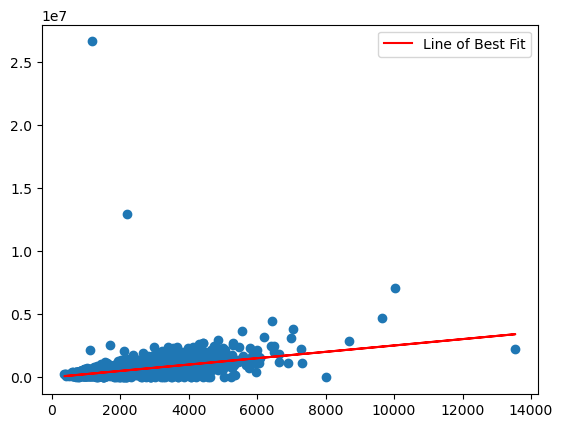

In [226]:
plt.scatter(hd['sqft_living'], hd['price'])
slope_sl, y_int_sl = np.polyfit(hd['sqft_living'], hd['price'], 1)
line = slope_sl * hd['sqft_living'] + y_int_sl
plt.plot(hd['sqft_living'], line, color='red', label='Line of Best Fit')
plt.legend()
plt.show()

In [221]:
hd['price'].corr(hd['sqft_living'])

np.float64(0.4304100254326281)

In [222]:
r, p = stats.pearsonr(hd['sqft_living'], hd['price'])
print(r, p)

0.43041002543262796 7.549895925377047e-207


(array([1.470e+02, 7.970e+02, 1.102e+03, 1.009e+03, 6.990e+02, 4.000e+02,
        2.120e+02, 1.050e+02, 7.200e+01, 2.000e+01, 1.400e+01, 7.000e+00,
        6.000e+00, 5.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00]),
 array([  370.,   870.,  1370.,  1870.,  2370.,  2870.,  3370.,  3870.,
         4370.,  4870.,  5370.,  5870.,  6370.,  6870.,  7370.,  7870.,
         8370.,  8870.,  9370.,  9870., 10370., 10870., 11370., 11870.,
        12370., 12870., 13370.]),
 <BarContainer object of 26 artists>)

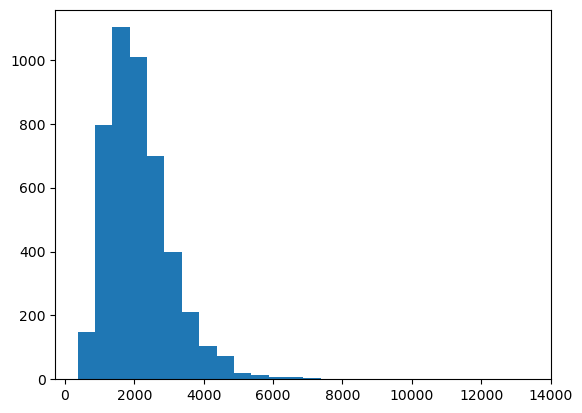

In [229]:
bin_sftl = np.arange(hd['sqft_living'].min(), hd['sqft_living'].max(), 500)
plt.hist(hd['sqft_living'], bins=bin_sftl)

In [235]:
r, p = stats.pearsonr(hd['sqft_living'], hd['price'])
print(r, p)

0.43041002543262796 7.549895925377047e-207


(array([223., 118., 207., ...,   0.,   0.,   0.]),
 array([6.380000e+02, 1.638000e+03, 2.638000e+03, ..., 1.071638e+06,
        1.072638e+06, 1.073638e+06]),
 <BarContainer object of 1073 artists>)

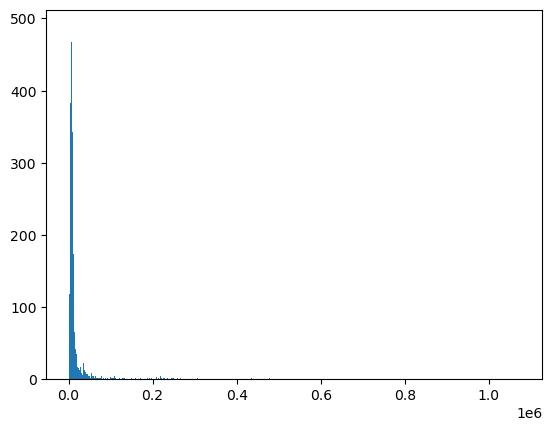

In [233]:
bin_sftt = np.arange(hd['sqft_lot'].min(), hd['sqft_lot'].max(), 1000)
plt.hist(hd['sqft_lot'], bins=bin_sftt)

In [237]:
hd['view'] = hd['view'].apply(lambda x: str(x))

f_stat, p_val, f_crit, ssw, ssb, dfb, dfw = anova("price ~  view", hd)
print(f"dfb: {dfb}, dfw: {dfw}\nF-statistic: {f_stat}, p-value: {p_val}, f-critical value: {f_crit}\nssw: {ssw:.6e}, ssb: {ssb:.6e}")

dfb: 4, dfw: 4595
F-statistic: 65.69970054594782, p-value: 1.1102230246251565e-16, f-critical value: 0.8392973918060608
ssw: 1.382971e+15, ssb: 7.909534e+13


In [241]:
hd['view'] = hd['view'].apply(lambda x: str(x))

f_stat, p_val, f_crit, ssw, ssb, dfb, dfw = anova("price ~  waterfront", hd)
print(f"dfb: {dfb}, dfw: {dfw}\nF-statistic: {f_stat}, p-value: {p_val}, f-critical value: {f_crit}\nssw: {ssw:.6e}, ssb: {ssb:.6e}")

dfb: 1, dfw: 4598
F-statistic: 86.19130941779665, p-value: 1.1102230246251565e-16, f-critical value: 0.4550084083763347
ssw: 1.435163e+15, ssb: 2.690270e+13


In [243]:
hd['floors'] = hd['floors'].apply(lambda x: str(x))

f_stat, p_val, f_crit, ssw, ssb, dfb, dfw = anova("price ~  floors", hd)
print(f"dfb: {dfb}, dfw: {dfw}\nF-statistic: {f_stat}, p-value: {p_val}, f-critical value: {f_crit}\nssw: {ssw:.6e}, ssb: {ssb:.6e}")

dfb: 5, dfw: 4594
F-statistic: 28.731140680616058, p-value: 1.1102230246251565e-16, f-critical value: 0.8704200614921981
ssw: 1.417733e+15, ssb: 4.433293e+13


There seems to be a correlation between sqft_lot, sqft_living, view, waterfront, floors, and zipcode with price

<BarContainer object of 4600 artists>

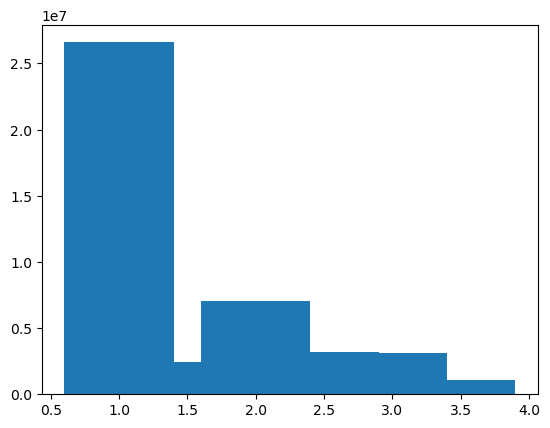

In [287]:
plt.bar(hd['floors'], hd['price'])

In [290]:
hd[(hd['floors'] == 1) & (hd['price'] > 1e7)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4346,2014-06-23 00:00:00,12899000.0,3.0,2.5,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA
4350,2014-07-03 00:00:00,26590000.0,3.0,2.0,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA


In [292]:
hd[hd['price'] < 1e7]['price'].mean()

np.float64(543614.7775069127)

In [294]:
hd[hd['floors'] == 1]['price'].mean()

np.float64(457278.68726064125)

In [295]:
hd[(hd['floors'] == 1) & (hd['price'] < 1e7)]['price'].mean()

np.float64(439518.81496530114)

<Axes: xlabel='floors', ylabel='price'>

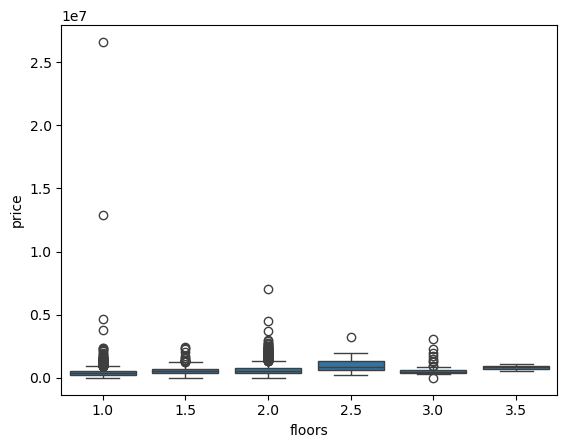

In [301]:
sns.boxplot(x = hd['floors'], y = hd['price'])

<Axes: xlabel='waterfront', ylabel='price'>

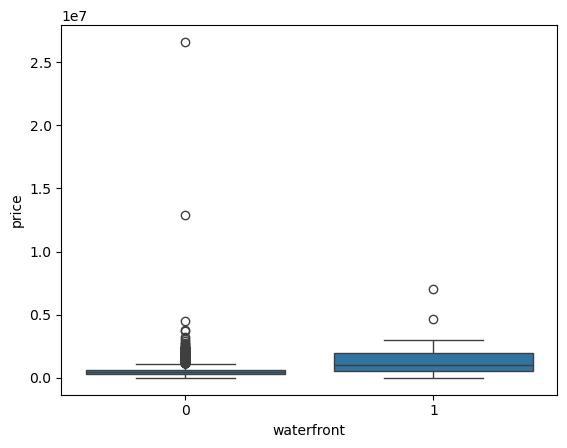

In [304]:
sns.boxplot(x = hd['waterfront'], y = hd['price'])

<Axes: xlabel='sqft_living', ylabel='price'>

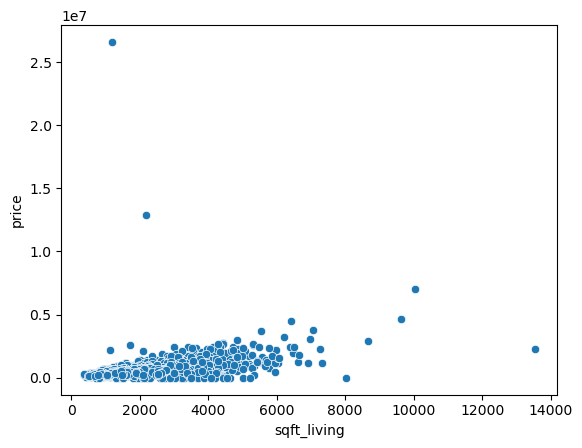

In [305]:
sns.scatterplot(x = hd['sqft_living'], y = hd['price'])

<Axes: xlabel='sqft_lot', ylabel='price'>

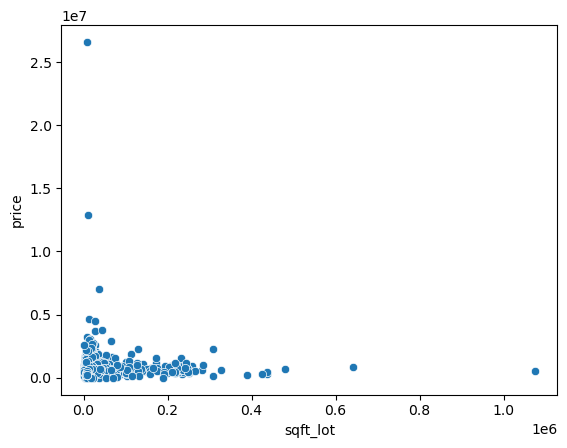

In [306]:
sns.scatterplot(x = hd['sqft_lot'], y = hd['price'])

<Axes: xlabel='sqft_lot', ylabel='price'>

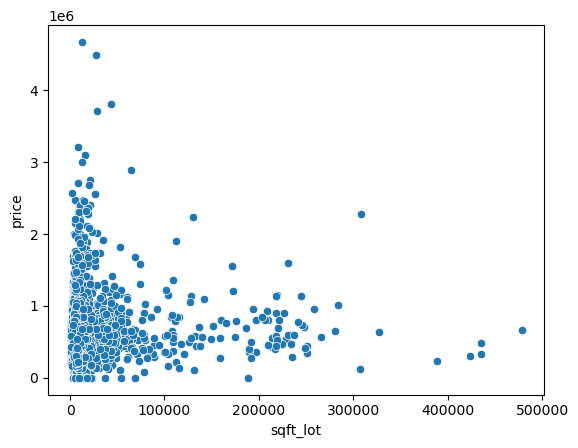

In [308]:
sns.scatterplot(x = hd[hd['sqft_lot'] < 0.6e6]['sqft_lot'], y = hd[hd['price'] < 0.5e7]['price'])

In [313]:
hd[hd['price'] > 1e7]['statezip']

4346    WA 98199
4350    WA 98031
Name: statezip, dtype: object

In [310]:
hd[hd['statezip'] == 'WA 98004']['price'].mean()

np.float64(1317106.0162162161)

In [317]:
hd[hd['statezip'] == 'WA 98199']['price'].mean()

np.float64(943158.6631652059)

In [312]:
hd[hd['statezip'] == 'WA 98031']['price'].mean()

np.float64(682613.4707491515)

In [318]:
hd[(hd['statezip'] == 'WA 98199') & (hd['price'] < 1e7)]['price'].mean()

np.float64(764713.2700781194)

In [319]:
hd[(hd['statezip'] == 'WA 98031') & (hd['price'] < 1e7)]['price'].mean()

np.float64(284038.29337606154)

In [325]:
np.log10(hd[hd['price'] > 1e7]['price'])

4346    12899000.0
4350    26590000.0
Name: price, dtype: float64